In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

from lib.image_processing import find_borders, group_features

%matplotlib inline

In [2]:
def imshow_all(images):
    _, ax = plt.subplots(1, len(images), figsize=(20,6))
    for index, img in enumerate(images):
        ax[index].imshow(img, cmap='gray')
    plt.show()

In [3]:
night_img = cv2.imread('./test_assets/night_1.png')
day_img = cv2.imread('./test_assets/day_1.png')

canvas_night = cv2.cvtColor(night_img, cv2.COLOR_BGR2GRAY)
canvas_day = cv2.cvtColor(day_img, cv2.COLOR_BGR2GRAY)

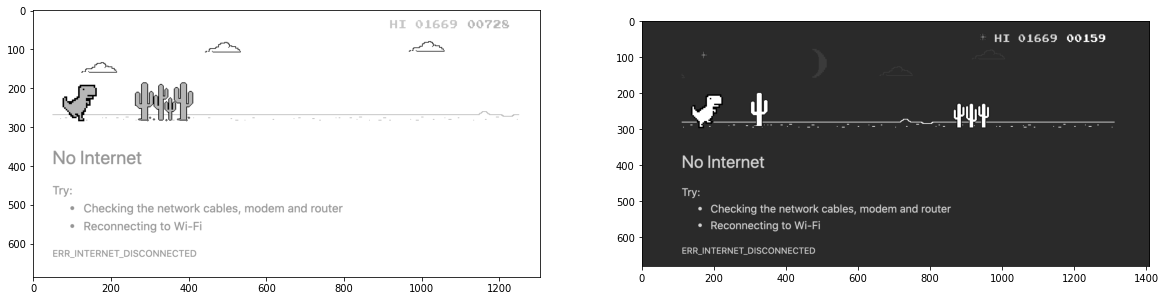

In [4]:
imshow_all([canvas_day,canvas_night])

In [5]:
print(np.median(canvas_day), np.median(canvas_night))

255.0 30.0


Loading a templare with `dino` to perform a search and detect bounderies on the canvas

In [6]:
# using Canny edge detection on the whole range from 0 to 255
canny_day = find_borders(canvas_day)
canny_night = find_borders(canvas_night)

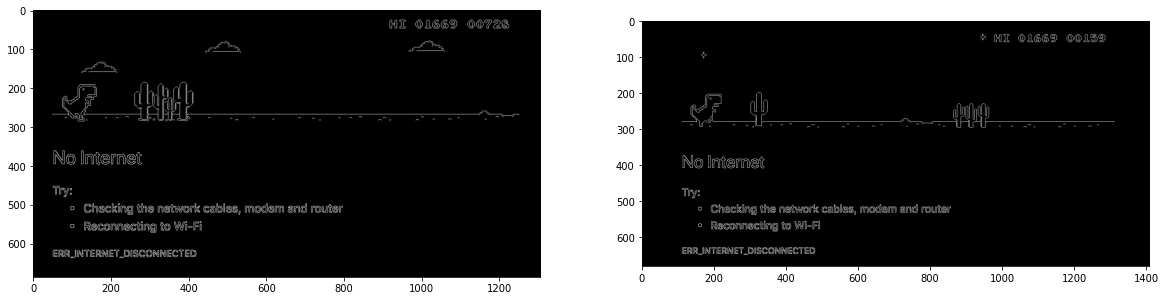

In [7]:
imshow_all([canny_day, canny_night])

In [8]:
dino_template = cv2.imread('./assets/dino_crop.png')
dino_template = cv2.cvtColor(dino_template, cv2.COLOR_BGR2GRAY)

In [9]:
dino_bordered_template = cv2.Canny(dino_template, threshold1=0, threshold2=255)

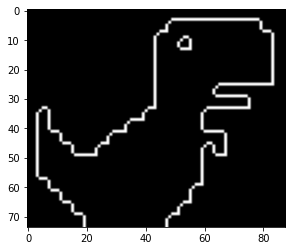

In [10]:
plt.imshow(dino_bordered_template, cmap='gray')

In [11]:
dino_bordered_template.shape

(74, 88)

In [30]:
match_res = cv2.matchTemplate(canny_night, dino_bordered_template, cv2.TM_CCOEFF_NORMED)
_, max_val, _, max_loc = cv2.minMaxLoc(match_res)

In [31]:
print(max_val, max_loc)

0.811663031578064 (136, 206)


In [32]:
dino_h, dino_w = dino_bordered_template.shape

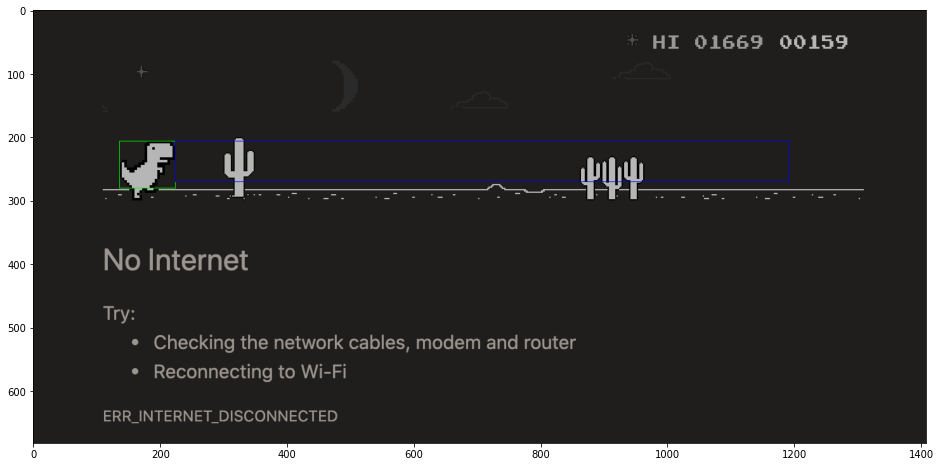

In [33]:
canvas_night_with_dino = night_img.copy()
dino_size = dino_bordered_template.shape
bottom_right = (max_loc[0] + dino_w, max_loc[1] + dino_h)
cv2.rectangle(canvas_night_with_dino, max_loc, bottom_right, (0, 255, 0))

# [(top_x, topy), (bottom_x, bottom_y)]
region_to_watch_after = [(max_loc[0] + dino_w, max_loc[1]), (max_loc[0] + 12 * dino_w, max_loc[1] + dino_h - 10)]
cv2.rectangle(canvas_night_with_dino, region_to_watch_after[0], region_to_watch_after[1], (0, 0, 255))

plt.figure(figsize=(16,8))
plt.imshow(canvas_night_with_dino)

In [34]:
workin_region = canny_night.copy()
(top_x, top_y), (bottom_x, bottom_y) = region_to_watch_after
working_region = workin_region[top_y:bottom_y, top_x: bottom_x]
working_region.shape

(64, 968)

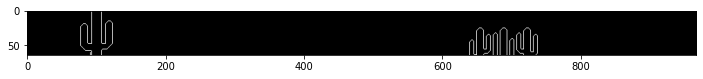

In [35]:
plt.figure(figsize=(12,3))
plt.imshow(working_region, cmap='gray')

In [36]:
location_group = group_features(working_region)

location_group

[(70, 60), (630, 110)]